In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from textblob import TextBlob
import spacy
import seaborn as sns
import pickle
from utils.model import *
from utils.file_io_helper import read_books_json, parse_book_nlp_html, match_character_text, unicode_normalizer
%matplotlib inline
nlp = spacy.load('en')


2.7.13 |Anaconda custom (64-bit)| (default, Dec 20 2016, 23:09:15) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [8]:
html = '../tools/book-nlp/data/output/1.F.1984.txt/1.F.1984.txt.html'
pair_dict, ind_dict = parse_book_nlp_html(html)

[0.0, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777778, 0.8888888888888888, 1.0] [ 24.   6.   1.   0.   8.  12.   1.   6.   3.   0.]
[0.0, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777778, 0.8888888888888888, 1.0] [ 207.  179.  127.  186.  143.  117.  127.  131.  121.  101.]
[0.0, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777778, 0.8888888888888888, 1.0] [  32.    1.    5.   11.   24.   64.    6.  117.  140.  108.]
[0.0, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777778, 0.8888888888888888, 1.0] [  0.   0.   0.  52.  96.  19.  40.   6.  14.  19.]
[0.0, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.

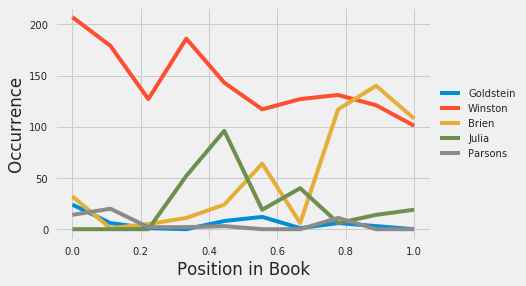

In [115]:
from matplotlib.pyplot import hist
from cycler import cycler

NUM_BINS = 10

def normalize(occurencies, normalization_constant):
    return [o / float(len(processed_text)) for o in occurencies]

def plot_character_timeseries(character_offsets, character_labels, normalization_constant=None):
    """
    Plot characters' personal names specified in `character_labels` list as time series.
    
    :param character_offsets: dict object in form {'elizabeth': [123, 543, 4534], 'darcy': [205, 2111]}
    :param character_labels: list of strings that should match some of the keys in `character_offsets`
    :param normalization_constant: int
    """
    x = [character_offsets[character_label] for character_label in character_labels] 
    with plt.style.context('fivethirtyeight'):
        plt.figure()
        n, bins, patches = plt.hist(x, NUM_BINS, label=character_labels)
        plt.clf()
        
        ax = plt.subplot(111)
        for i, a in enumerate(n):
            print [float(x) / (NUM_BINS - 1) for x in range(len(a))], a
            ax.plot([float(x) / (NUM_BINS - 1) for x in range(len(a))], a, label=character_labels[i])
            
        matplotlib.rcParams['axes.prop_cycle'] = cycler(color=['r','k','c','b','y','m','g','#54a1FF'])
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax.set_xlabel('Position in Book')
        ax.set_ylabel('Occurrence')
#plot_character_timeseries(character_occurences, ['darcy', 'bingley'], normalization_constant=len(processed_text))
plot_character_timeseries(ind_dict, ind_dict.keys())

[0.0, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777778, 0.8888888888888888, 1.0] [  0.   0.   0.   4.  37.   8.   4.  15.   2.   0.]
[0.0, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777778, 0.8888888888888888, 1.0] [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[0.0, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777778, 0.8888888888888888, 1.0] [ 1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[0.0, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777778, 0.8888888888888888, 1.0] [  7.   0.   0.   2.   1.  17.   0.   3.  24.  10.]
[0.0, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.

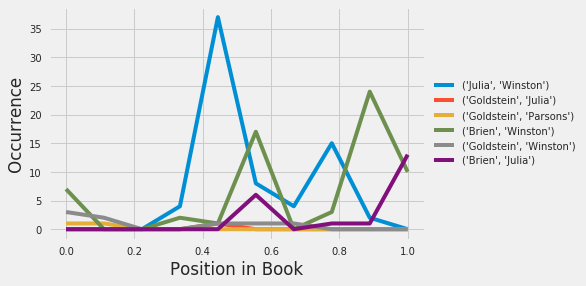

In [116]:
pair_dict_index = {key:[ch[0] for ch in pair_dict[key]] for key in pair_dict}
pair_dict_sent = {key:[ch[1] for ch in pair_dict[key]] for key in pair_dict}

plot_character_timeseries(pair_dict_index, pair_dict_index.keys()[:6])

In [94]:
pair_dict

defaultdict(list,
            {('Brien',
              'Goldstein'): [(3429,
               u"For the moment he (O'Brien) had forgotten the shadowy figure of Goldstein."), (3483,
               u"Meanwhile I shall send you a copy of THE BOOK'--even O'Brien, Winston noticed, seemed to pronounce the words as though they were in italics--`Goldstein's book, you understand, as soon as possible.")],
             ('Brien',
              'Julia'): [(3255,
               u"He (O'Brien) had not bothered to look up when the servant showed Julia and Winston in."), (3278,
               u"He (O'Brien) could not even fall back on the pretence that he (O'Brien) had come to borrow the dictionary, because in that case Julia's presence was impossible to explain."), (3374,
               u"He (O'Brien) turned himself toward Julia and added in a voice with somewhat more expression in it: `Do you understand that even if he (O'Brien) survives, it may be as a different person?"), (3383,
               u"Juli

In [102]:
pair_dict_polarity = {key: [[ch[0] for ch in pair_dict[key]],
                            [TextBlob(ch[1]).sentiment.polarity for ch in pair_dict[key]]] for key in pair_dict}

6261

In [99]:
pair_dict_sent[('Brien',
  'Goldstein')]

[u"For the moment he (O'Brien) had forgotten the shadowy figure of Goldstein.",
 u"Meanwhile I shall send you a copy of THE BOOK'--even O'Brien, Winston noticed, seemed to pronounce the words as though they were in italics--`Goldstein's book, you understand, as soon as possible."]

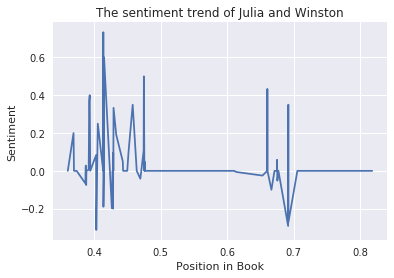

In [117]:
x,y = pair_dict_polarity['Julia', 'Winston']
max_sent = max( [ ii for i in ind_dict.values() for ii in i])
x = [xx/float(max_sent) for xx in x]
plt.plot(x,y)
plt.title('The sentiment trend of {} and {}'.format('Julia', 'Winston'))
plt.xlabel('Position in Book')
plt.ylabel('Sentiment')

In [82]:
# load the model from disk
filename = 'finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
# loaded_model.predict(['Before Sheriff Mapes can take Charlie in , Luke Will and Will crew arrive . They demand that Mapes hand Charlie over .'])
pair_dict_pred= {key: loaded_model.predict([' '.join(pair_dict_sent[key])]) for key in pair_dict_sent}

In [83]:
pair_dict_pred

{('Brien', 'Goldstein'): array(['family'], 
       dtype='|S12'), ('Brien', 'Julia'): array(['family'], 
       dtype='|S12'), ('Brien', 'Winston'): array(['family'], 
       dtype='|S12'), ('Goldstein', 'Julia'): array(['family'], 
       dtype='|S12'), ('Goldstein', 'Parsons'): array(['family'], 
       dtype='|S12'), ('Goldstein', 'Winston'): array(['family'], 
       dtype='|S12'), ('Julia', 'Winston'): array(['family'], 
       dtype='|S12'), ('Parsons', 'Winston'): array(['family'], 
       dtype='|S12')}

In [84]:

pair_sentences=pickle.load(open('../data/pair_sentences.p', 'rb'))

In [130]:
loaded_model.predict(['A few weeks later, Hagrid wins a dragon egg in a pokergame. Because it is illegal to own dragons, Harry, Ron, and Hermione contact Ron’s older brother, who studies dragons.'])

array(['family'], 
      dtype='|S12')